## Testing Linear Regression assumptions on diabetes dataset

**This notebook explains the assumptions of linear regression in detail. One of the most essential steps to take when modelling linear regression is to check for these assumptions.**

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

http://staff.pubhealth.ku.dk/~tag/Teaching/share/data/Diabetes.html

The data consist of 19 variables on 403 subjects from 1046 subjects who were interviewed in a study to understand the prevalence of obesity, diabetes, and other cardiovascular risk factors in central Virginia for African Americans. According to Dr John Hong, Diabetes Mellitus Type II (adult onset diabetes) is associated most strongly with obesity. The waist/hip ratio may be a predictor in diabetes and heart disease. DM II is also agssociated with hypertension - they may both be part of "Syndrome X". The 403 subjects were the ones who were actually screened for diabetes. Glycosolated hemoglobin > 7.0 is usually taken as a positive diagnosis of diabetes.

In [2]:
# 1. load data
import pandas as pd
url = 'http://bioinfo.ipmb.uni-heidelberg.de/crg/datascience3fs/practicals/data/diabetes_full.csv'

df = pd.read_csv(url, delimiter='\t', index_col=0)
df.head()

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
id,,,,,,,,,,,,,,,,,,
1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


As this is notebook about testing linear regression assumptions, I am going to skip EDA and go straight to modelling.

In [3]:
# 2. preprocessing
df.drop(['location', 'gender', 'frame', 'time.ppn', 'bp.2d', 'bp.2s'], inplace=True, axis=1)
df = df.dropna()
df['bmi'] = 703 * df['weight'] / df['height']**2
df.drop(['weight', 'height'], inplace=True, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1000 to 41752
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chol      377 non-null    float64
 1   stab.glu  377 non-null    int64  
 2   hdl       377 non-null    float64
 3   ratio     377 non-null    float64
 4   glyhb     377 non-null    float64
 5   age       377 non-null    int64  
 6   bp.1s     377 non-null    float64
 7   bp.1d     377 non-null    float64
 8   waist     377 non-null    float64
 9   hip       377 non-null    float64
 10  bmi       377 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 35.3 KB


In [4]:
columns = list(df.columns.values)
columns.remove('glyhb')
columns

['chol',
 'stab.glu',
 'hdl',
 'ratio',
 'age',
 'bp.1s',
 'bp.1d',
 'waist',
 'hip',
 'bmi']

In [5]:
# 3. fitting a linear regression model
y = df['glyhb']
X = df.drop('glyhb', axis=1)

import statsmodels.api as sm
X_const = sm.add_constant(X)
diabetes_model = sm.OLS(y, X_const)
results = diabetes_model.fit()

# 4. predictions
y_pred = results.predict(X_const)

In [6]:
results.params

const      -0.300405
chol        0.003599
stab.glu    0.027203
hdl         0.002554
ratio       0.131592
age         0.011395
bp.1s       0.002747
bp.1d      -0.003151
waist       0.023392
hip         0.011667
bmi        -0.018786
dtype: float64

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  glyhb   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     52.84
Date:                Thu, 12 May 2022   Prob (F-statistic):           5.91e-65
Time:                        17:32:49   Log-Likelihood:                -665.58
No. Observations:                 377   AIC:                             1353.
Df Residuals:                     366   BIC:                             1396.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3004      0.983     -0.306      0.760      -2.233       1.632
chol           0.0036      0.003      1.117      0.265      -0.003       0.010
stab.glu       0.0272      0.001     18.137      0.000       0.024       0.030
hdl            0.0026      0.010      0.256      0.798      -0.017       0.022
ratio          0.1316      0.111      1.188      0.235      -0.086       0.349
age            0.0114      0.006      2.029      0.043       0.000       0.022
bp.1s          0.0027      0.005      0.578      0.564      -0.007       0.012
bp.1d         -0.0032      0.007     -0.429      0.668      -0.018       0.011
waist          0.0234      0.026      0.891      0.373      -0.028       0.075
hip            0.0117      0.032      0.365      0.715      -0.051       0.075
bmi           -0.0188      0.026     -0.720      0.472      -0.070       0.033
==============================================================================
Omnibus:                      152.362   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1744.002
Skew:                           1.365   Prob(JB):                         0.00
Kurtosis:                      13.177   Cond. No.                     4.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**General overview of the statistics:**

1. Model Summary
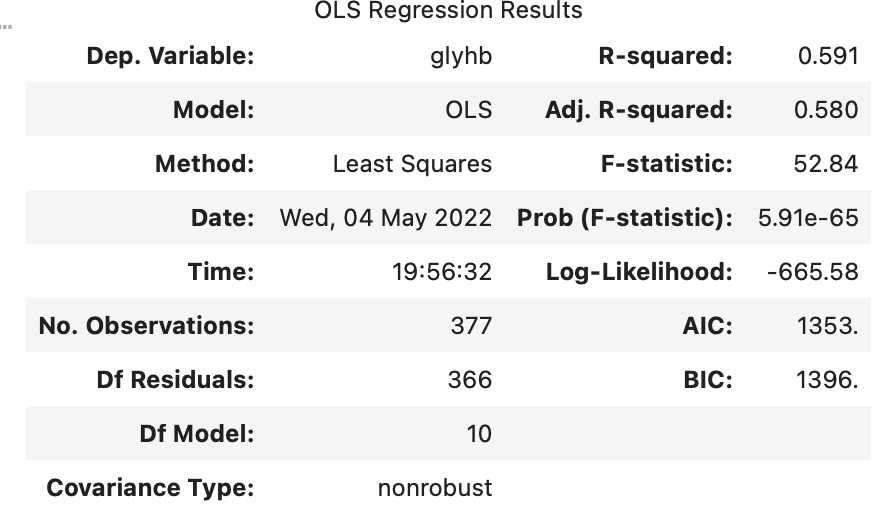


- **Df Residuals** is another name for our Degrees of Freedom in our model. It's calculated based on sample size minus number of parameters estimating: n - (k+1)
- **Df Model** - number of parameters we are estimating
- **R-squared** is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.591 would mean our model explains 59.1% of the change in our ‘glyhb’ variable.
- **Adjusted R-squared** is important for analyzing multiple dependent variables efficacy on the model. Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly.
-----
 For R-squared, it always goes up if you add new features. For adjusted R-squared, though, it only goes up if the extra parameters are useful.
- The **F-statistic** in linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary.
- **Prob (F-Statistic)** uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables effect is 0. In this case, it is telling us it's very unlikely.
- **Log-likelihood**
- **AIC**
- **BIC**

In [8]:
from scipy.stats import skew
skew(y-y_pred)

1.3653373189980453

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


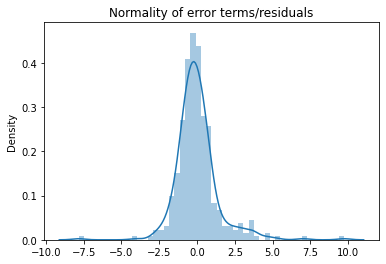

In [9]:
p = sns.distplot(y-y_pred, kde=True)
p = plt.title('Normality of error terms/residuals')

- **std error** is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points. 
- **t** is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.
- **P>|t|** is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.265 for chol is saying there is a 26.5% chance the chol variable has no affect on the dependent variable, glyhb, and our results are produced by chance. Proper model analysis will compare the p value to a previously established alpha value, or a threshold with which we can apply significance to our coefficient. A common alpha is 0.05, which only two of our variables pass in this instance (age and stab.glu).
- [0.025 and 0.975] are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

In [10]:
y_pred

id
1000      4.645922
1001      5.258356
1002      5.728729
1003      5.169421
1005      6.127813
           ...    
41503     5.999312
41506    13.242985
41507     5.366442
41510     9.698377
41752     4.530648
Length: 377, dtype: float64

## Gauss Markov Assumptions
Linear Regression model is solved using OLS (Ordinary Least Squares) and some conditions have to be met in order for OLS to be a good estimate (BLUE - best linear unbiased estimate):
- best - variance of the oLS estimator is minimal and smaller than the variance of any other estimator
- linear - if relationship is not linear, OLS is not applicable
- unbiased - the expected values of estimated independent variables are not underestimated or overestimated, but close to true values describing relationship between independent and dependent variables

Here we are going to show which conditions need to be satisfied.

It's worth to note that most real data do not satisfy these conditions, since they are not generated by an ideal experiment. One has to be aware of the ideal conditions and their violation to be able to control for deviations from these conditions and render results unbiased or at least consistent.

### 1. Linearity
Linear Regression model assumes that there is a straight-line relationship between predictors and the response. This also assumes that the predictors are additive. If the true relationship is far from linear, then all the predictions will be extremely inaccurate because the model is underfitting. In addition, accuracy of the model can be significantly reduced.

How to check?
- predictor vs response plot
- observed vs fitted plot
- residual plot (plot residuals vs predictor, or in multiple linear regression, plot residuals vs predicted values)

Ideally, residual plots will show no discernible pattern.

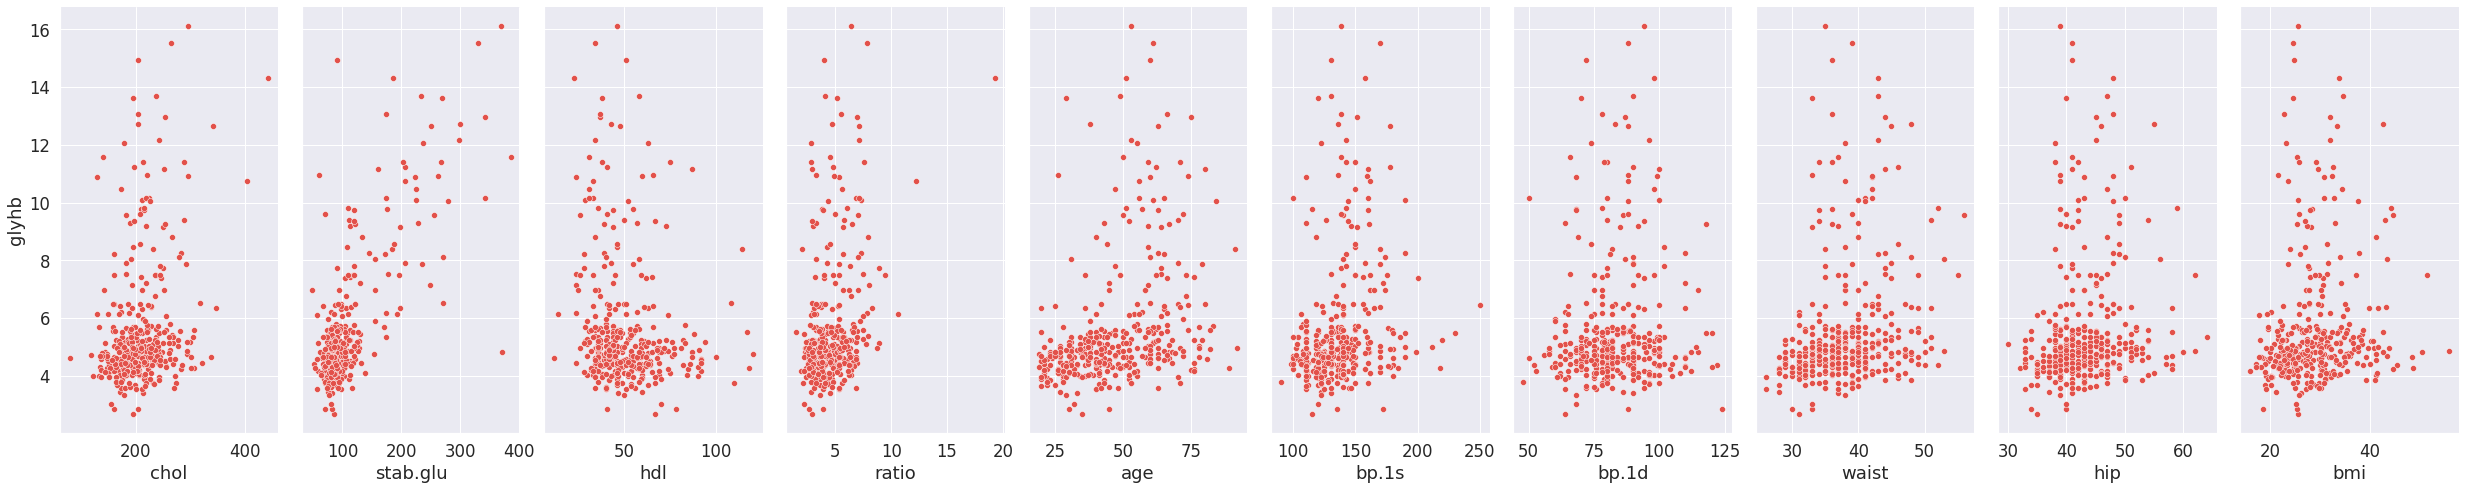

In [11]:
# predictor vs response plot
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
p = sns.pairplot(df, x_vars=columns, y_vars='glyhb', height=7, aspect=0.5)

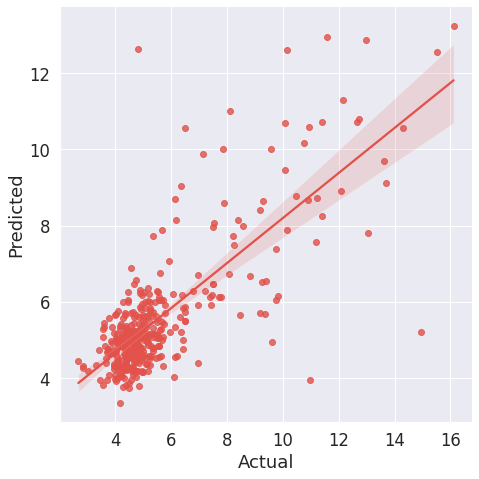

In [12]:
# observed vs fitted plot
df_results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=True, height=7)

Text(0, 0.5, 'Residuals')

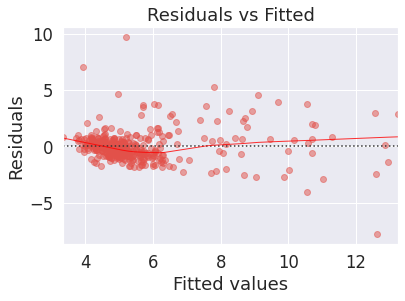

In [13]:
# residual plot
residuals = y - y_pred
plot = sns.residplot(x=y_pred, y=residuals,  lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

**How to improve the model?**

Either adding polynomial terms to some of the predictors or applying nonlinear transformations . If those do not work, try adding additional variables to help capture the relationship between the predictors and the label.

### 2. Expected value of the error term is zero for all obervations


The error term accounts for the variation in the dependent variable that the independent variables do not explain. Random chance should determine the values of the error term. For your model to be unbiased, the average value of the error term must equal zero.

This assumption concerns the model errors, not the model residuals!! The model residuals estimate the (unknown) model errors. Since the model errors are assumed to have mean zero, then the model residuals "mimic" that and have an average of zero (hence a sum of zero). So here we check if expected value of resiudals is 0 which should mimic expected value of error term.

**Note:**
An **error** is the difference between the observed value and the true value (very often unobserved, generated by the DGP).

A **residual** is the difference between the observed value and the predicted value (by the model).

In [14]:
print(f"Mean of Residuals {np.mean(residuals)}")

Mean of Residuals -2.2480102071030755e-14


It seems like for our model, expected value of the error term is close to zero so we are fine. If this would not be the case, the problem would be intercept which would be biased (it would be underestimated/overestimated), but in the case where constant/intercept is present, the expected value of error terms is always 0.

### 3. Homoscedasticity
Another important assumption is that the error terms have a constant variance (homoscedasticity). The standard errors, confidence intervals and hypothesis tests associated with the linear model rely upon this assumption. Heteroscedasticity, case when error terms don't have constant variance, reduces the precision of the estimates in OLS.

One way to identifying the non-constant variances in the error terms is graphically by checking for presence of the funnel shape in the residual plot. (Check the residual plot above).

We can also perform some statistical test to check for heteroscedasticity, more specifically we can check Goldfeld Quandt Test.

**Goldfeld Quandt Test**

* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [15]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.0010033637797517), ('p-value', 0.49727532715156375)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good!

If we would see a signs of heteroscedasticity, one possible solution is to transform the response Y using a concave function such as logY or sqrt(Y). Such transformations result in a greater amount of shrinkage of the larger responses, leading to a reduction in heteroscedasticity.

### 4. No Autocorrelation/ No Serial Correlation
Meaning, observations of the error term are uncorrelated with each other. When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data. Autocorrelation, as heteroscedasticity, reduces the precision of OLS estimates. If there is in fact a correlation between the error terms, then the estimated standard errors will tend to underestimate the true standard errors. As a result, confidence and prediction intervals will be narrower than they should be. In addition, p-values associated with the model will be lower than they should be, this could cause that we conclude that a parameter is statistically significant. In short, if the error terms are correlated, we may have an not justified sense of confidence in our model.

Again, we can check autocorrelaction graphically. There should not be autocorrelation in the data so the error terms should not form any pattern.

Text(0.5, 1.0, 'Residuals vs fitted values plot for autocorrelation check')

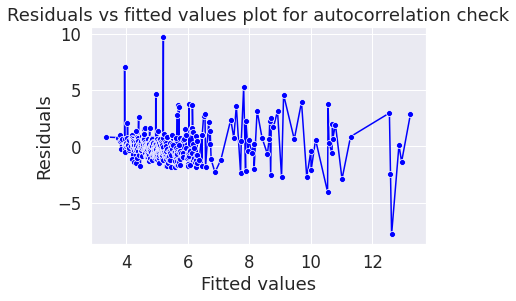

In [16]:
p = sns.lineplot(x=y_pred, y=residuals, marker='o', color='blue')
p.set_xlabel('Fitted values')
p.set_ylabel('Residuals')
p.set_title('Residuals vs fitted values plot for autocorrelation check')

Error terms don't follow any specific pattern.
We can also check for autocorrelation using statistical test.


**Ljungbox test:**

Null Hypothesis: Autocorrelation is absent.

Alternative Hypothesis: Autocorrelation is present.

In [17]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)['lb_pvalue'])

0.45058133344181495

Since p value is larger than 0.05 we can't reject the null hypothesis that error terms are not autocorrelated. Good!

**Note**: When assumption 4 (no autocorrelation) and 3 (homoscedasticity) are both true, statisticians say that the error term is **independent and identically distributed** (IID)

### 5. No perfect multicollinearity
Multicollinearity in regression sense refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity. This only affects inference only, trying to understand how each independent variables affects dependent variable

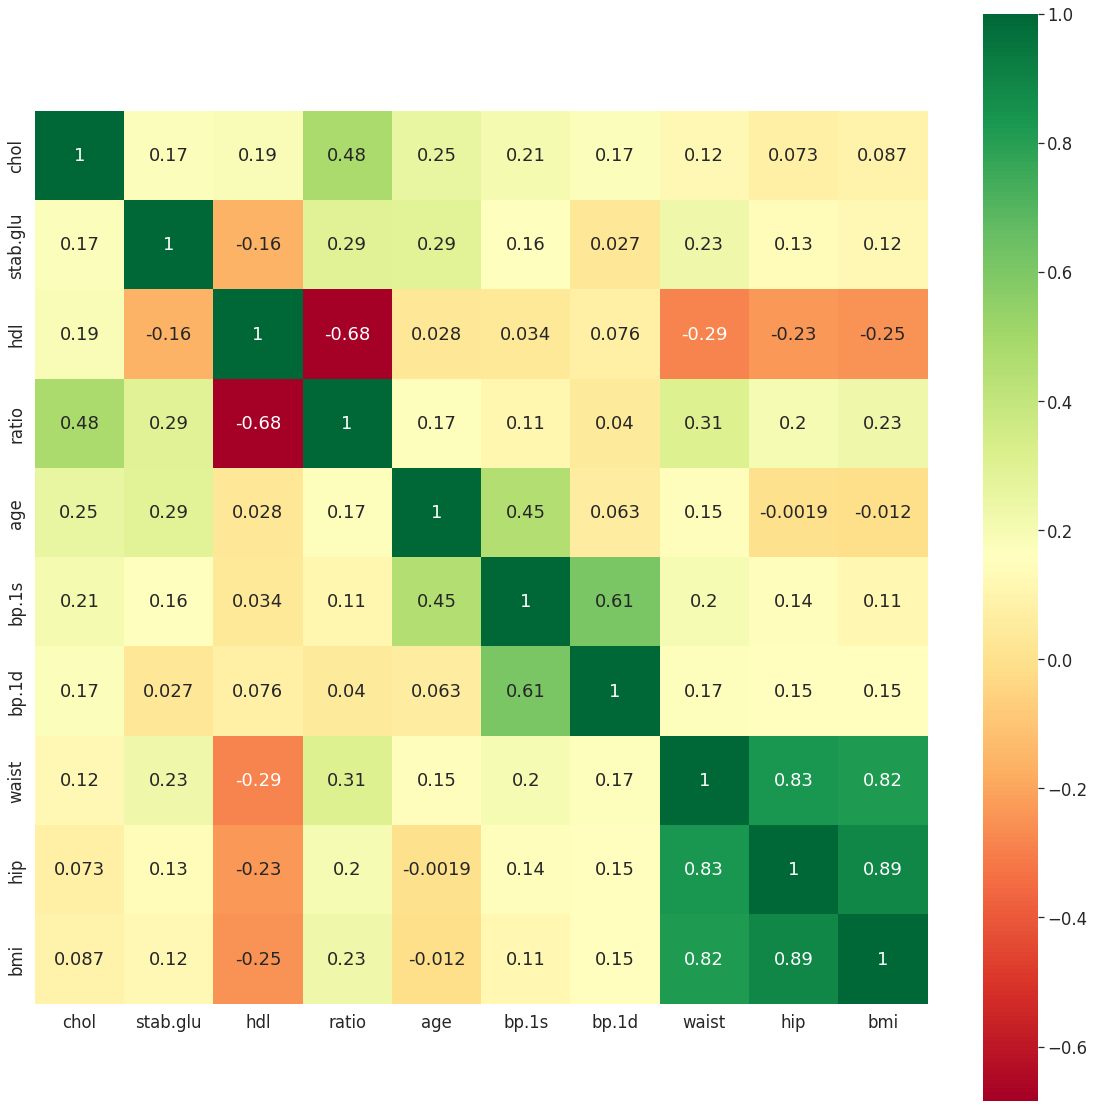

In [18]:
plt.figure(figsize=(20,20))
p=sns.heatmap(X.corr(), annot=True, cmap='RdYlGn', square=True)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])]
df_vif = pd.DataFrame({'vif': vif[1:]}).T
df_vif.columns = X_const.columns[1:]
df_vif

,chol,stab.glu,hdl,ratio,age,bp.1s,bp.1d,waist,hip,bmi
vif,3.777434,1.195598,5.497425,6.892995,1.594223,2.208969,1.800213,4.173952,5.914201,5.471856


### 6. All independent variables are uncorrelated with the error term

### References:
1. https://warwick.ac.uk/fac/soc/economics/staff/vetroeger/teaching/po906_week8910.pdf
2. https://people.duke.edu/~rnau/testing.htm
3. https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/
4. https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression/notebook

In [20]:
y = df['glyhb']
X = df[['stab.glu', 'age']]

import statsmodels.api as sm
X_const = sm.add_constant(X)
diabetes_model = sm.OLS(y, X_const)
results = diabetes_model.fit()

# 4. predictions
y_pred = results.predict(X_const)

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  glyhb   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     245.5
Date:                Thu, 12 May 2022   Prob (F-statistic):           8.03e-69
Time:                        17:32:56   Log-Likelihood:                -675.96
No. Observations:                 377   AIC:                             1358.
Df Residuals:                     374   BIC:                             1370.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6654      0.243      6.839      0.000       1.187       2.144
stab.glu       0.0289      0.001     19.849      0.000       0.026       0.032
age            0.0175      0.005      3.703      0.000       0.008       0.027
==============================================================================
Omnibus:                      147.165   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1906.230
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                      13.723   Cond. No.                         416.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""